# Mini Lab

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:blue'> Mini Lab Executive Summary </span>
* This exercise seeks to fit **logistic regression**  and **Support Vector Machine** models to our groups dataset: *Olist E-Commerce* dataset. 
* We will develop a base classifier that determines if a package is <span style='color:red'> **'late', 'on time' or 'early'**</span> and subsequently tune the hyperparameters for possible improvement to the performance metrics (i.e. Accuracy, Precision, F-Score and Sensitivity).
* This modeling phase will utilize the 'clean' dataset that was processed for the visualization task, but still needs some data preprocessing due to the transfer from one project to the next using a CSV file. 
* The **derived** response for the objective is actual delivery duration. Therefore the predictive model will predict actual delivery duration with performance measured on the held out test set. 

In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# change working directory
# os.chdir(r"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset")
#"C:\Users\olani\OneDrive\Documents\Data Science\SMU-Data Science\Machine Learning 1\Olist_Dataset"

os.chdir(r"C:\Users\justi\GitHub\olist\python")
# get current working directory
os.getcwd()

'C:\\Users\\justi\\GitHub\\olist\\python'

In [3]:
olist = pd.read_csv('olist_clean.csv')
olist.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range,review_score_class
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,13,26,13,7803.0,too early,bad
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,3,19,16,1056.0,too early,good
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,4,20,16,3360.0,too early,good
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good


In [4]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           114067 non-null  object 
 1   customer_id                        114067 non-null  object 
 2   order_purchase_timestamp           114067 non-null  object 
 3   order_approved_at                  114067 non-null  object 
 4   order_delivered_carrier_date       114067 non-null  object 
 5   order_delivered_customer_date      114067 non-null  object 
 6   order_estimated_delivery_date      114067 non-null  object 
 7   customer_unique_id                 114067 non-null  object 
 8   customer_zip_code_prefix           114067 non-null  int64  
 9   customer_city                      114067 non-null  object 
 10  customer_state                     114067 non-null  object 
 11  review_id                          1140

## <span style='color:blue'> **Data Preprocessing** </span>

In [5]:
#Create a working dataframe from the copy of original
import copy
olist_class = copy.deepcopy(olist)  
olist_class.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,seller_state,tot_order_amt,purchase_wk_day,purchase_month,order_delivery_actual_duration,order_delivery_estimated_duration,delivery_estimate_discrepancy,product_dimensions,delivery_est_discrepancy_range,review_score_class
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,...,SP,99.33,Wednesday,April,13,26,13,7803.0,too early,bad
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,...,SP,24.39,Tuesday,June,3,19,16,1056.0,too early,good
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,...,SP,65.71,Tuesday,December,4,20,16,3360.0,too early,good
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,...,SP,107.78,Wednesday,December,14,28,14,3080.0,too early,good


In [6]:
#Modify datatypes
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_lenght','product_description_lenght', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score',
                       'order_delivery_actual_duration', 'order_delivery_estimated_duration',
                       'delivery_estimate_discrepancy', 'product_dimensions', 'tot_order_amt'] 

cat_features = ['customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id', 'purchase_wk_day', 'purchase_month',
               'delivery_est_discrepancy_range', 'review_score_class', 'customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 



In [7]:
# use the "astype" function to change the variable type
olist_class[continuous_features] = olist_class.copy()[continuous_features].astype(np.float64)
olist_class[cat_features] = olist_class.copy()[cat_features].astype("category")
#olist_class[date_features] = pd.to_datetime(olist_class.copy()[date_features])
#olist_class.info()

In [8]:
# fix dates
for i in date_features:
    olist_class.loc[:,i] = pd.to_datetime(olist_class.copy().loc[:,i], errors="coerce")

In [9]:
olist_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           114067 non-null  category      
 1   customer_id                        114067 non-null  category      
 2   order_purchase_timestamp           114067 non-null  datetime64[ns]
 3   order_approved_at                  114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date       114067 non-null  datetime64[ns]
 5   order_delivered_customer_date      114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date      114067 non-null  datetime64[ns]
 7   customer_unique_id                 114067 non-null  category      
 8   customer_zip_code_prefix           114067 non-null  category      
 9   customer_city                      114067 non-null  category      
 10  customer_state      

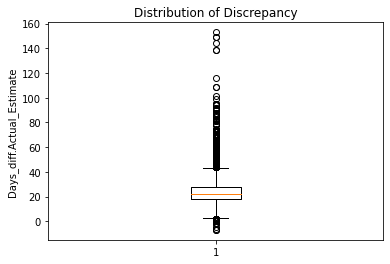

In [10]:
plt.boxplot(x=olist.order_delivery_estimated_duration)
plt.ylabel('Days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels
plt.show()

In [11]:
olist.copy()['order_delivery_estimated_duration'].quantile(0.95)

38.0

In [12]:
estimate_delivery = []
estimate_delivery_out = []

thresh = np.quantile(olist.copy()['order_delivery_estimated_duration'], 0.95)
[estimate_delivery.append(i)
 if abs(i) <= thresh else estimate_delivery_out.append(i)
 for i in olist.copy()['order_delivery_estimated_duration']]
#y = np.array(y)

len(estimate_delivery), len(estimate_delivery_out), (len(estimate_delivery)/olist.shape[0])


(108875, 5192, 0.9544828916338643)

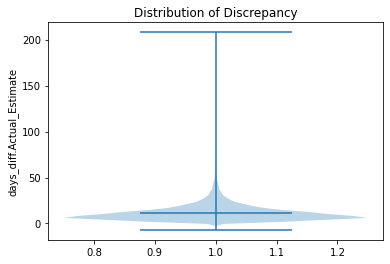

In [13]:
plt.violinplot(olist.order_delivery_actual_duration, showmeans=True)
plt.ylabel('days_diff.Actual_Estimate')
plt.title('Distribution of Discrepancy') #labels
plt.show()

### <span style='color:blue'> Subset the dataset </span>

Using an intuitive approach to what might cause a package to be categorized as delivered early, on time or late we subset the preprocessed dataset. This also will allow us more flexibility in running multiple iterations of our classifiers to determine the most efficient runing parameters.

In [14]:
olist_class2 = copy.deepcopy(olist_class[['payment_sequential', 'product_category_english', 
                                          'seller_zip_code_prefix','seller_city', 'tot_order_amt', 
                                          'freight_value', 'product_dimensions', 'review_score_class', 
                                          'product_weight_g', 'customer_city',
                                          'customer_zip_code_prefix','order_approved_at', 'order_delivery_actual_duration']])
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114067 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114067 non-null  float64       
 1   product_category_english        114067 non-null  category      
 2   seller_zip_code_prefix          114067 non-null  category      
 3   seller_city                     114067 non-null  category      
 4   tot_order_amt                   114067 non-null  float64       
 5   freight_value                   114067 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114067 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114067 non-null  category      
 10  customer_zip_code_prefix        114067 non-null  categor

In [15]:
olist_class2.dropna(inplace=True)

In [16]:
olist_class2.shape, olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114066 non-null  float64       
 1   product_category_english        114066 non-null  category      
 2   seller_zip_code_prefix          114066 non-null  category      
 3   seller_city                     114066 non-null  category      
 4   tot_order_amt                   114066 non-null  float64       
 5   freight_value                   114066 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114066 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114066 non-null  category      
 10  customer_zip_code_prefix        114066 non-null  categor

((114066, 13), None)

In [17]:
#olist_class2.loc[olist_class2.order_delivery_actual_duration > 50, ('order_delivery_actual_duration')]= np.NaN
olist_class2.head()

,payment_sequential,product_category_english,seller_zip_code_prefix,seller_city,tot_order_amt,freight_value,product_dimensions,review_score_class,product_weight_g,customer_city,customer_zip_code_prefix,order_approved_at,order_delivery_actual_duration
0,1.0,home_construction,13321.0,salto,99.33,19.53,7803.0,bad,800.0,teofilo otoni,39801,2018-04-25 22:15:09,13.0
1,1.0,auto,4660.0,sao paulo,24.39,7.39,1056.0,good,150.0,sao paulo,2422,2018-06-26 11:18:58,3.0
2,1.0,perfumery,9015.0,santo andre,65.71,8.72,3360.0,good,250.0,sao paulo,2652,2017-12-14 09:52:34,4.0
3,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0
4,1.0,bed_bath_table,13405.0,piracicaba,107.78,17.88,3080.0,good,1200.0,juiz de fora,36060,2017-12-06 12:13:20,14.0


In [18]:
for i in olist_class2:
    print('Unique value counts for ' + i + ' attribute is: =', olist_class2[i].nunique())

Unique value counts for payment_sequential attribute is: = 26
Unique value counts for product_category_english attribute is: = 73
Unique value counts for seller_zip_code_prefix attribute is: = 2136
Unique value counts for seller_city attribute is: = 588
Unique value counts for tot_order_amt attribute is: = 26460
Unique value counts for freight_value attribute is: = 6902
Unique value counts for product_dimensions attribute is: = 4416
Unique value counts for review_score_class attribute is: = 3
Unique value counts for product_weight_g attribute is: = 2167
Unique value counts for customer_city attribute is: = 4073
Unique value counts for customer_zip_code_prefix attribute is: = 14844
Unique value counts for order_approved_at attribute is: = 87124
Unique value counts for order_delivery_actual_duration attribute is: = 147


In [19]:
#review class is an important attribute 
#but with class imbalance so we split the dataset 
#to ensure that samples are representatinve of the class levels
olist_class2['review_score_class'].value_counts()

good    87129
bad     17295
fair     9642
Name: review_score_class, dtype: int64

In [20]:
olist_class2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114066 entries, 0 to 114066
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   payment_sequential              114066 non-null  float64       
 1   product_category_english        114066 non-null  category      
 2   seller_zip_code_prefix          114066 non-null  category      
 3   seller_city                     114066 non-null  category      
 4   tot_order_amt                   114066 non-null  float64       
 5   freight_value                   114066 non-null  float64       
 6   product_dimensions              114066 non-null  float64       
 7   review_score_class              114066 non-null  category      
 8   product_weight_g                114066 non-null  float64       
 9   customer_city                   114066 non-null  category      
 10  customer_zip_code_prefix        114066 non-null  categor

In [21]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

In [22]:
olist_class2 = olist_class2.sample(n=12000)

### <span style='color:blue'> === 80:20 Train:Test Split of the dataset === </span>

In [23]:
#Simple train test split

from sklearn.model_selection import train_test_split
olist_train, olist_test = train_test_split(olist_class2, test_size=0.2,random_state=100)

In [24]:
olist_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 64629 to 76078
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   payment_sequential              9600 non-null   float64       
 1   product_category_english        9600 non-null   category      
 2   seller_zip_code_prefix          9600 non-null   category      
 3   seller_city                     9600 non-null   category      
 4   tot_order_amt                   9600 non-null   float64       
 5   freight_value                   9600 non-null   float64       
 6   product_dimensions              9600 non-null   float64       
 7   review_score_class              9600 non-null   category      
 8   product_weight_g                9600 non-null   float64       
 9   customer_city                   9600 non-null   category      
 10  customer_zip_code_prefix        9600 non-null   category      
 11 

In [25]:
olist_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 16067 to 34569
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   payment_sequential              2400 non-null   float64       
 1   product_category_english        2400 non-null   category      
 2   seller_zip_code_prefix          2400 non-null   category      
 3   seller_city                     2400 non-null   category      
 4   tot_order_amt                   2400 non-null   float64       
 5   freight_value                   2400 non-null   float64       
 6   product_dimensions              2400 non-null   float64       
 7   review_score_class              2400 non-null   category      
 8   product_weight_g                2400 non-null   float64       
 9   customer_city                   2400 non-null   category      
 10  customer_zip_code_prefix        2400 non-null   category      
 11 

In [26]:
#Target variable
olist_train_y = olist_train.order_delivery_actual_duration
len(olist_train_y)

9600

In [27]:
#All predictor attributes
olist_train_noY = olist_train.copy().drop('order_delivery_actual_duration', axis=1)
olist_train_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 64629 to 76078
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        9600 non-null   float64       
 1   product_category_english  9600 non-null   category      
 2   seller_zip_code_prefix    9600 non-null   category      
 3   seller_city               9600 non-null   category      
 4   tot_order_amt             9600 non-null   float64       
 5   freight_value             9600 non-null   float64       
 6   product_dimensions        9600 non-null   float64       
 7   review_score_class        9600 non-null   category      
 8   product_weight_g          9600 non-null   float64       
 9   customer_city             9600 non-null   category      
 10  customer_zip_code_prefix  9600 non-null   category      
 11  order_approved_at         9600 non-null   datetime64[ns]
dtypes: category(6),

### Preprocess the test for prediction

In [28]:
#Target variable
olist_test_y = olist_test.order_delivery_actual_duration
len(olist_test_y)

2400

In [29]:
#All predictor attributes
olist_test_noY = olist_test.copy().drop('order_delivery_actual_duration', axis=1)
olist_test_noY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 16067 to 34569
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_sequential        2400 non-null   float64       
 1   product_category_english  2400 non-null   category      
 2   seller_zip_code_prefix    2400 non-null   category      
 3   seller_city               2400 non-null   category      
 4   tot_order_amt             2400 non-null   float64       
 5   freight_value             2400 non-null   float64       
 6   product_dimensions        2400 non-null   float64       
 7   review_score_class        2400 non-null   category      
 8   product_weight_g          2400 non-null   float64       
 9   customer_city             2400 non-null   category      
 10  customer_zip_code_prefix  2400 non-null   category      
 11  order_approved_at         2400 non-null   datetime64[ns]
dtypes: category(6),


https://www.kaggle.com/kylegilde/building-columntransformers-dynamically

In [30]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score

listing 79 features in the code or a configuration file seems is a tedious and unnecessary task. What if there was a way to logically bucket these features by their characteristics?

The key insight that allows you to dynamically construct a ColumnTransformer is understanding that there are 3 broad types of features in non-textual, non-time series datasets:

- numerical
- categorical with moderate-to-low cardinality
- categorical with high cardinality

In [31]:
#select features with logical conditions instead of listing every single column in the code
select_numeric_features = make_column_selector(dtype_include=np.number)
numeric_features = select_numeric_features(olist_train_noY)
print(f'N numeric_features: {len(numeric_features)} \n')
print(', '.join(numeric_features))

N numeric_features: 5 

payment_sequential, tot_order_amt, freight_value, product_dimensions, product_weight_g


#### Categorical  with moderate-to-low cardinality

One-hot (OH) encoding, where an indicator column is created for each unique value, is the most common method. However, the OH transformation may not be suitable for features with high cardinality. OH encoding features with many unique values may create too many columns with very low variance, which may take up too much memory or have a negative impact on the performance of linear models. Hence, we may want to limit the features we select for this encoding to ones below a certain threshold of unique values. 

Since the *make_column_selector* isn't capable of detecting cardinality, I've developed my own *select_oh_features* custom function. It consists of a piping of pandas methods that do the following:

- Selects the object and category dtypes from the pandas DataFrame

- Counts the number of unique values for those columns

- Subsets the unique value counts if they are less than or equal to MAX_OH_CARDINALITY using an anonymous lambda function within the loc method

- Extracts the column names from the index and returns them as a list

In [32]:
MAX_OH_CARDINALITY = 10

def select_oh_features(df):
    
    hc_features =\
        df\
        .select_dtypes(['object', 'category'])\
        .apply(lambda col: col.nunique())\
        .loc[lambda x: x <= MAX_OH_CARDINALITY]\
        .index\
        .tolist()
        
    return hc_features

oh_features = select_oh_features(olist_train_noY)

print(f'N oh_features: {len(oh_features)} \n')
print(', '.join(oh_features))

N oh_features: 1 

review_score_class


In [33]:
#oh_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))

In [34]:
#Try without imputer
oh_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

#### Categorical with high cardinality
To select the features with high cardinality, I've created a similar function that selects the object and category features with unique value counts greater than the threshold. It selects three features that meet these criteria.

In [35]:
def select_hc_features(df):
    
    hc_features =\
        df\
        .select_dtypes(['object', 'category'])\
        .apply(lambda col: col.nunique())\
        .loc[lambda x: x > MAX_OH_CARDINALITY]\
        .index\
        .tolist()
        
    return hc_features


hc_features = select_hc_features(olist_train_noY)

print(f'N hc_features: {len(hc_features)} \n')
print(', '.join(hc_features))

N hc_features: 5 

product_category_english, seller_zip_code_prefix, seller_city, customer_city, customer_zip_code_prefix


#### Generalized Linear Mixed Model Encoder

To transform our features with high cardinality, I could have gone with a more basic approach and used Scikit-Learn's native LabelEncoder or OrdinalEncoder preprocessor. However, in many cases, these methods are likely to perform suboptimally in your model unless you are dealing with ordinal data. I prefer to use the Category Encoder package, which has more than a dozen ways of intelligently encoding highly cardinal features. This post provides an overview of several of these methods. Most of these are supervised techniques, which use the dependent variable to transform the nominal values into numerical ones. The TargetEncoder is probably the easiest method to understand, but I prefer to use the Generalized Linear Mixed Model Encoder, which has "solid statistical theory behind [it]" and "no hyperparameters to tune." Without diving into the details of GLMMs, at its core, this method encodes the nominal values as the coefficents from a one-hot-encoded linear model. The Category Encoder methods handle missing and unknown values by setting them to zero or the mean of the dependent variable. 

In [36]:
import category_encoders as ce
hc_pipeline = make_pipeline(ce.GLMMEncoder())

In [37]:
numeric_pipeline = make_pipeline(StandardScaler()) 

In [38]:
column_transformer = ColumnTransformer(transformers=\
                                       [('numeric_pipeline', numeric_pipeline, select_numeric_features),\
                                        ('oh_pipeline', oh_pipeline1, select_oh_features),\
                                        ('hc_pipeline', hc_pipeline, select_hc_features)],                                       
                                       remainder='drop')

In [39]:
olist_train_y.describe()

count    9600.000000
mean       11.611354
std         9.769107
min        -6.000000
25%         6.000000
50%         9.000000
75%        15.000000
max       189.000000
Name: order_delivery_actual_duration, dtype: float64

In [40]:
olist_train_y.quantile(0.95)

28.0

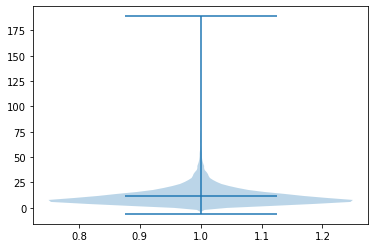

In [41]:
plt.violinplot(olist_train_y, showmeans=True)
plt.show()

In [42]:
olist_train_y.describe()

count    9600.000000
mean       11.611354
std         9.769107
min        -6.000000
25%         6.000000
50%         9.000000
75%        15.000000
max       189.000000
Name: order_delivery_actual_duration, dtype: float64

---
#### <span style='color:blue'>Create the categorical y training variable of customer reviews to be either 'late' = 1,'on time' = 2, 'early' = 3</span>

In [43]:
olist_train_y_range = pd.cut(olist_train_y, [-7, -1, 0, 208], 3, labels=[1,2,3]) # this creates a new variable
olist_train_y_range.describe()
#'late' = 1,'on time' = 2, 'early' = 3

count     9600
unique       3
top          3
freq      9574
Name: order_delivery_actual_duration, dtype: int64

In [44]:
olist_train_y_range.unique()

[3, 2, 1]
Categories (3, int64): [1 < 2 < 3]

In [45]:
olist_train_y_range

64629     3
9294      3
20414     3
36669     3
28693     3
         ..
40394     3
102841    3
10278     3
51003     3
76078     3
Name: order_delivery_actual_duration, Length: 9600, dtype: category
Categories (3, int64): [1 < 2 < 3]

---
#### <span style='color:blue'>Create the categorical y test variable of customer reviews to be either 'late' = 1,'on time' = 2, 'early' = 3</span>

In [46]:
olist_test_y_range = pd.cut(olist_test_y, [-7, -1, 0, 208], 3, labels=[1,2,3]) # this creates a new variable
olist_test_y_range.describe()
#'late' = 1,'on time' = 2, 'early' = 3

count     2400
unique       2
top          3
freq      2396
Name: order_delivery_actual_duration, dtype: int64

In [47]:
olist_test_y_range.isna().sum()

0

In [48]:
olist_train_y_range.value_counts()

3    9574
2      18
1       8
Name: order_delivery_actual_duration, dtype: int64

In [49]:
print(olist_train_noY.shape)
print(olist_train_y_range.shape)


(9600, 12)
(9600,)


### Normalize the feature values so that all the attributes are on the same dynamic range

In [51]:
#Make Y classification
X_train_class = column_transformer.fit_transform(olist_train_noY, olist_train_y_range)
X_test_class = column_transformer.transform(olist_test_noY)

C:\Users\justi\anaconda3\envs\ML\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


ValueError: Cannot predict random effects from singular covariance structure.

In [ ]:
print(X_train_class.shape)
print(X_test_class.shape)

---
# <span style='color:blue'> **1. Create Model (50 points)** </span>
---

- Create a **logistic regression model** and a **support vector machine model** for the **classification task** involved with your dataset.  

- Assess how well each model performs (use 80/20 training/testing split for your data).
    - <span style='color:green'> ***80/20 Split performed during preprocessing above***</span>

- Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
    - That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines.
            -For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe.

## <span style='color:blue'> Create a Logistic Regression classifier </span>


In [ ]:
from sklearn.metrics import classification_report

#Logistic regression
logr_clf = LogisticRegression(penalty='l2', #default
                              C=1, #default 
                              class_weight='balanced', # use with imbalanced dataset
                              solver='newton-cg', # only solver that works with this dataset
                              multi_class='multinomial', 
                              random_state=42) 
logr_clf.fit(X_train_class,olist_train_y_range)

# Note: For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
# ‘liblinear’ is limited to one-versus-rest schemes.
# Note: solver default lbfgs, sag and saga did not work, we hit max_iter and even set at 4000 it still did not work
# Note: only newton-cg works

#y_train_pred_class = sgd_clf.predict(X_train_class)
yhat_lr = logr_clf.predict(X_test_class)

print('Logistic Regression Metrics:')
print(logr_clf)
print(classification_report(olist_test_y_range, yhat_lr))

## <span style='color:blue'>Utilize RandomizedSearchCV to tune our Logistic Regression Model</span>

source: https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
X = X_train_class
y = olist_train_y_range
# create logistic Regression
lgr = LogisticRegression(solver='newton-cg')

# create regularization penalty space
penalty = ['l2','none']  #only penalties that work with newton-cg

# create regulatization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4) 

# create hyperparameter options
hyp = dict(C=C, penalty=penalty)

# create random search, 5fold CV, 100 iterations
clf = RandomizedSearchCV(lgr, hyp, random_state=42, n_iter=10, cv=5, verbose=0, n_jobs=-1)

#fit random search
best_model = clf.fit(X,y)

In [ ]:
# view hyperparameter values of best model
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Score: ', best_model.best_score_) 
print('Best Params: ', best_model.best_params_)
print('Best Time (seconds): ', best_model.refit_time_)

In [ ]:
# predict using best model
yhat = best_model.predict(X_test_class)

print('Best RandomSearchCV Logistic Regression Metrics:')
print(classification_report(olist_test_y_range, yhat, zero_division=0))

## <span style='color:blue'> 2. Create a linear SVM classifier with stochastic descent </span>

In [ ]:
# Basic SVM Model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_class, olist_train_y_range)

#y_train_pred_class = sgd_clf.predict(X_train_class)
yhat_svm = sgd_clf.predict(X_test_class)


In [ ]:
# SVM with SD Metrics
print('Logistic Regression Metrics:')
print(sgd_clf)
print(classification_report(olist_test_y_range, yhat_svm, zero_division=0))

## <span style='color:blue'>Utilize RandomizedSearchCV to tune our SVM Model</span>

In [ ]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 

# create variable dictionaries
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [1, 10, 100] 

# create hyperparameter options
param_distributions = dict(loss=loss, 
                           penalty=penalty, 
                           alpha=alpha, 
                           learning_rate=learning_rate, 
                           eta0=eta0)

# create the classifier
sgd = SGDClassifier(early_stopping=True, validation_fraction=0.15, max_iter=100, class_weight = "balanced") 

# create RandomizedSearchCV
random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            verbose=1, 
                            n_iter=100, 
                            n_jobs=-1) 
random_result = random.fit(X_train_class,olist_train_y_range) 



In [ ]:
# Print Best Results
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)
print('Best Time (seconds): ', random_result.refit_time_)

In [ ]:
# predict using best model
yhat_rand_svm = random_result.predict(X_test_class)

print('Best Random SVM SD Metrics:')
print(classification_report(olist_test_y_range, yhat_rand_svm, zero_division=0))

## <span style='color:blue'> Model Advantages (10 points) </span>
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

**Discussion:**
* We ran 2 basic models using only minimal tuning for multinomial classification and 2 refitted models using RandonSearchCV for tuning.
* We used multinomial classification 
* Basic Logistical Regression is the only model that was able to categorize deliveries that were made on-time (value #2) with a precision of 3%. 
* Refitted Logistical Regression: Once we tuned the model using RandomizedSearchCV with a 5-fold validation, the best model did not correctly classify any on time deliveries; however, the best fit model did increase the precision for classifying late deliveries from 64% to 79%! We also found the best model increased overall accuracy from 75% to 94%, but again, not correctly categorizing any of the on time deliveries. 
* SVM with Stochastic Descent with minor tuning to handle multinormial classification returned an overall accuracy of 94%, but failed to correctly classify any on time packages. This model did present the best precision for categorizing late deliveries at 85%, but fell short of the classification on early deliveries to the basic logistical regression model 95% to 98%.
* Reffited SVM with Stochastic Descent: we again utilized RandomSearchCV to tune our SVM with stochastic decent and found that the resulting best model had the fastest time of 0.72seconds, while maintaining an overall accuracy of 94% that was in line with both the refitted logistical regression model and the initial SVM stochastic descent model. This model was also not able to correctly categorize on time deliveries and fell short of the untuned SVM model's precision of late deliveries...it did have better recall on the SVM's categorization of late deliveries. This model also had the best overall performance of identifying early deliveries based on the ratio between the precision and the recall that was rounded in this report, but from looking at the raw numbers it has a slightly better ratio than the other models.
* Time - we found the best time was the best fit SVM stochastic descent model at 0.71seconds compared to the best fit Logistical Regression model at just over 9 seconds.
* Overall the best performing model was the refit SVM stochastic descent model, even thought it failed to correctly categorize any ontime deliveries. To improve this performance we should probaly look at breaking the categories into more equal sizes that cover a similiar time frame in terms of days.



In [ ]:
print('\n================================================================\n')
print('=== Logistic Regression Metrics using minor tuning for class_weight, solver ===')
print(logr_clf)
print(classification_report(olist_test_y_range, yhat_lr))

print('\n================================================================\n')
print('=== Best RandomSearchCV Logistic Regression Metrics ===\n')
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Score: ', best_model.best_score_) 
print('Best Params: ', best_model.best_params_)
print('Best Time (seconds): ', best_model.refit_time_)
print(classification_report(olist_test_y_range, yhat, zero_division=0))

print('\n================================================================\n')
print('=== SVM with Stochastic Descent  Metrics ===\n')
print(classification_report(olist_test_y_range, yhat_svm, zero_division=0))

print('\n================================================================\n')
print('=== Best RandomSeachCV SVM-SD Metrics ===\n')
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)
print('Best Time (seconds): ', random_result.refit_time_)
print(classification_report(olist_test_y_range, yhat_rand_svm, zero_division=0))

### <span style='color:blue'> **Discssion** </span>


# <span style='color:blue'> 3. Interpret Feature Importance (30 points) </span>

- Use the weights from logistic regression to interpret the importance of different features for the classification task.
- Explain your interpretation in detail. Why do you think some variables are more important?

In [ ]:
logr_clf.coef_

In [ ]:
# iterate over the coefficients
weights = np.exp(logr_clf.coef_).T # take transpose to make a column vector
variable_names = olist_train_noY.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has odds ratio of', coef[0])

**Discussion**
- We reported the exponent of the coeficients as the odds ratio.
- The odds ratio of a coefficient indicates how the risk of the outcome falling in the comparison group compared to the risk of the outcome falling in the referent group changes with the variable in question.
- An odds ratio > 1 indicates that the risk of the outcome falling in the comparison group relative to the risk of the outcome falling in the referent group increases as the variable increases.
    - In other words, the comparison outcome is more likely.  An odds ratio < 1 indicates that the risk of the outcome falling in the comparison group relative to the risk of the outcome falling in the referent group decreases as the variable increases.
- Sellers' zipcode: This is the relative risk ratio comparing a seller's zipcode to that of her counterparts to determine whether a customer receives their order early or late, that the other variables in the model are held constant.
    - We can say that the odds of getting a package early given the seller's zipcode relative to other sellers' zipcodes would be expected to increase by a factor of 31.26. This essentially implies that the sellers zipcode is an essential factor that determines early delivery of a package.

In [ ]:
# sort these attributes and spit them out
zip_vars = zip(logr_clf.coef_.T, olist_class2.columns) # combine attributes
zip_vars =list(zip_vars)


wts = pd.Series([item[0][0] for item in zip_vars],
               index = [item[1] for item in zip_vars])
wts = sorted(abs(wts))
wts
#for coef, name in zip_vars:
 #   print(name, 'has weight of', coef[0]) # now print them out

# <span style='color:blue'> 4. Interpret support vectors </span>

- Look at the chosen support vectors for the classification task. 
- Do these provide any insight into the data? Explain. 
- If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model
    - then analyze the support vectors from the subsampled dataset.